## Identifying Pattern and Trands in Campus Placement Data Using Maching Learning

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score


In [84]:
# Load the File

df = pd.read_csv('/content/collegePlace.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [69]:
# Discriptive stat

df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [70]:
df.shape

(2966, 8)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [87]:
# Check Null Values and It Counts
df.isnull().any()

Age                  False
Gender               False
Stream               False
Internships          False
CGPA                 False
Hostel               False
HistoryOfBacklogs    False
PlacedOrNot          False
dtype: bool

In [88]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

<ipython-input-89-98412e995dae>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


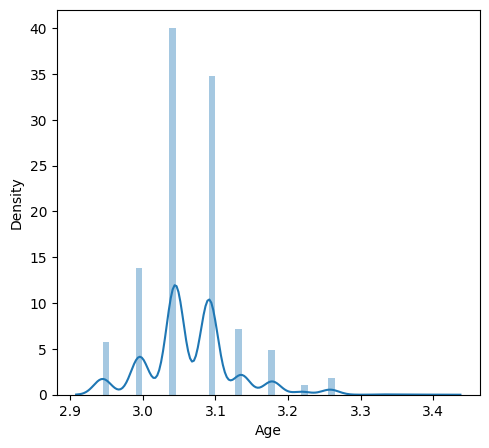

In [89]:
# Handling Outliers
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)

transformationplot(np.log(df['Age']))

In [90]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
# Drop unwanted Datas in DataFrame

df.drop(columns=['Hostel'],inplace=True)

In [93]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1
1,21,Female,Computer Science,0,7,1,1
2,22,Female,Information Technology,1,6,0,1
3,21,Male,Information Technology,0,8,1,1
4,22,Male,Mechanical,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0
2962,23,Male,Mechanical,1,7,0,0
2963,22,Male,Information Technology,1,7,0,0
2964,22,Male,Computer Science,1,7,0,0


<ipython-input-97-ae4b4eebd9e4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'], color='g')


<Axes: xlabel='CGPA', ylabel='Density'>

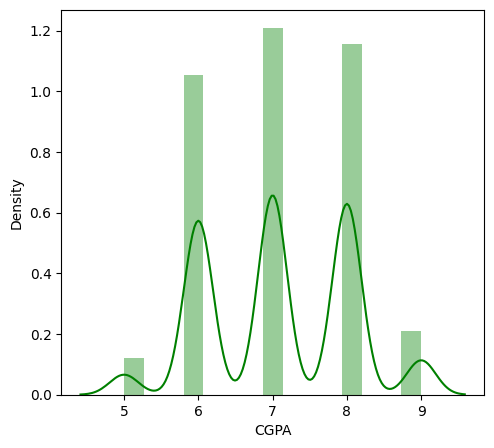

In [97]:
# Exploratory Analysis
# Univariate Anaylysis

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'], color='g')

<ipython-input-103-ce4ecd69df70>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'],color='g')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

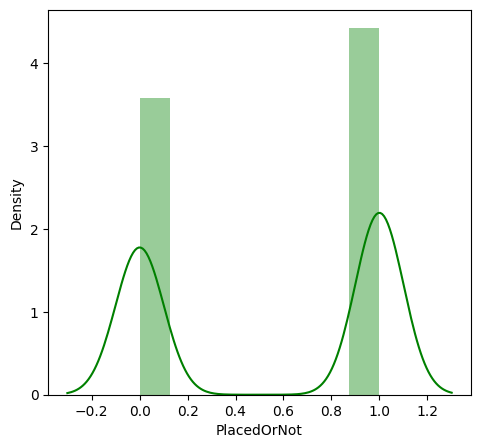

In [103]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='g')

<Axes: xlabel='PlacedOrNot', ylabel='count'>

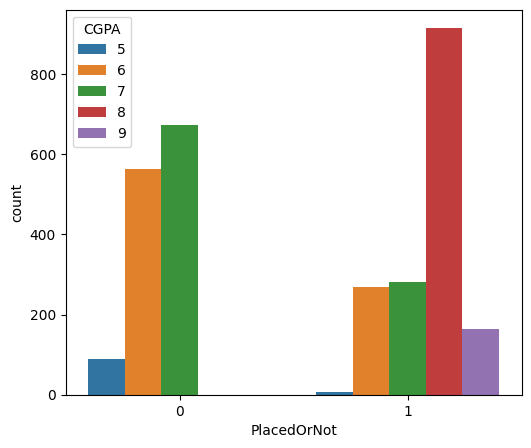

In [104]:
# Multivariate Analysis

plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=df["PlacedOrNot"],hue=df['CGPA'])

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


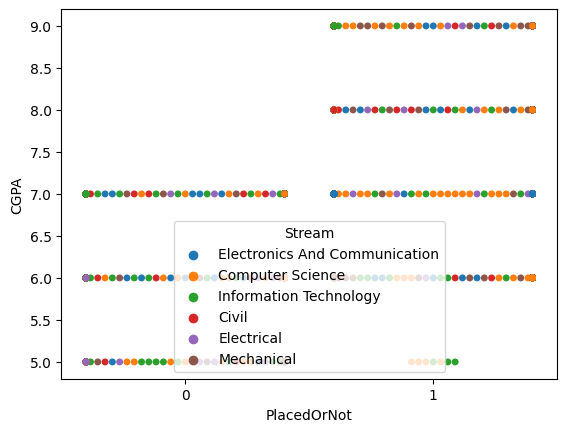

In [105]:
sns.swarmplot(x=df['PlacedOrNot'],y=df['CGPA'],hue=df['Stream'])

In [106]:
# Find Uniqueness

df['Gender'].unique()

array([1, 0])

In [107]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [108]:
# Feature mapping

df['Gender'].replace({"Male":1,"Female":0},inplace=True)

In [110]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1
1,21,0,Computer Science,0,7,1,1
2,22,0,Information Technology,1,6,0,1
3,21,1,Information Technology,0,8,1,1
4,22,1,Mechanical,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,1,Information Technology,0,7,0,0
2962,23,1,Mechanical,1,7,0,0
2963,22,1,Information Technology,1,7,0,0
2964,22,1,Computer Science,1,7,0,0


In [111]:
df['Stream'].replace({"Electronics And Communication":1,"Computer Science":2,"Information Technology":3,"Mechanical":4,"Electrical":5,"Civil":6},inplace=True)

In [112]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,1,1,8,1,1
1,21,0,2,0,7,1,1
2,22,0,3,1,6,0,1
3,21,1,3,0,8,1,1
4,22,1,4,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,1,3,0,7,0,0
2962,23,1,4,1,7,0,0
2963,22,1,3,1,7,0,0
2964,22,1,2,1,7,0,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   HistoryOfBacklogs  2966 non-null   int64
 6   PlacedOrNot        2966 non-null   int64
dtypes: int64(7)
memory usage: 162.3 KB


In [114]:
# Spliting independent & dependent variables

x = df.drop('PlacedOrNot', axis=1)
y = df['PlacedOrNot']

In [115]:
x

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,1,1,1,8,1
1,21,0,2,0,7,1
2,22,0,3,1,6,0
3,21,1,3,0,8,1
4,22,1,4,0,8,0
...,...,...,...,...,...,...
2961,23,1,3,0,7,0
2962,23,1,4,1,7,0
2963,22,1,3,1,7,0
2964,22,1,2,1,7,0


In [116]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [117]:
# Spliting training data & testing data

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=15)


In [118]:
print("Shape of independent training data is {}. Shape of independent testing data is {}".format(xtrain.shape, xtest.shape))
print("Shape of dependent training data is {}. Shape of dependent testing data is {}".format(ytrain.shape, ytest.shape))


Shape of independent training data is (2372, 6). Shape of independent testing data is (594, 6)
Shape of dependent training data is (2372,). Shape of dependent testing data is (594,)


In [119]:
# Initializing logistic reg

log_r = LogisticRegression()

In [120]:
# Training model

log_r.fit(xtrain,ytrain)

LogisticRegression()

In [121]:
ypred = log_r.predict(xtest)

In [122]:
ypred

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,

In [123]:
# Evaluating model

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       271
           1       0.82      0.81      0.82       323

    accuracy                           0.80       594
   macro avg       0.80      0.80      0.80       594
weighted avg       0.80      0.80      0.80       594



In [124]:
confusion_matrix(ytest,ypred)

array([[212,  59],
       [ 60, 263]])

In [125]:
log_r.predict([[22,1,2,1,8,1]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])